In [281]:
# Импорт библиотек
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
import csv
import codecs
import matplotlib.pyplot as plt


In [118]:
#Импорт логов
path='D:\Work\OZON\8.11.21-12.11.21\Excel'
dirs=os.listdir(path)

df=pd.DataFrame()
for d in dirs:
    print('Загружаю '+d)
    if '.csv' in d: temp_df=pd.read_csv(path+'\\'+d,encoding='cp1251',error_bad_lines=False,sep=';',skiprows=1,header=None,quoting=2 )
#     break
    df=pd.concat([df,temp_df])
df_new[['Date', 'Type','Msg']] = df[0].str.split(';', 2, expand=True,)


Загружаю 10.11.csv


C:\Users\Helik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Helik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Загружаю 11.12.csv
Загружаю 12.11.csv
Загружаю 8.11.csv
Загружаю 9.11.csv


In [378]:
df_new[['Proj_raw']]=df_new.Msg.str.extract(r'([A-z]{1,}-\d{2,}|[A-z]{1,}\d*-\d{2,})', expand=True)
df_new[['Project']]=df_new.Proj_raw.str.extract(r'([A-z]{1,}\d*)', expand=True)
df_new['Date_h']=pd.to_datetime(df_new.Date.str[:11] + df_new.Date.str[11:-6].str.zfill(2),format='%d.%m.%Y %H',errors='coerce')
# df_new.Msg.str.extract(r'(Update|)', expand=True)

In [379]:
df_to_plot=df_new[['Date_h','Project']]
df_to_plot.dropna()

,Date_h,Project
0,2021-11-10 00:00:00,MPCRM
1,2021-11-10 00:00:00,MPCRM
2,2021-11-10 00:00:00,MPCRM
3,2021-11-10 00:00:00,MPCRM
4,2021-11-10 00:00:00,MPCRM
...,...,...
253365,2021-11-09 23:00:00,CTASK
253366,2021-11-09 23:00:00,MPCRM
253367,2021-11-09 23:00:00,NEWMA
253368,2021-11-09 23:00:00,DOCFL


In [380]:
df_to_plot[['Count']]=1
# df_to_plot[["Date"]]=
df_to_plot=df_to_plot.groupby(["Date_h", "Project"], as_index=False)["Count"].count()
df_to_plot.sort_values(by='Count', ascending=False,inplace=True)

df_all_grouped=df_to_plot[['Project','Count']]
df_all_grouped=df_to_plot.groupby(["Project"], as_index=False)["Count"].sum()
df_all_grouped=df_all_grouped.sort_values(by='Count', ascending=False,ignore_index=True)


C:\Users\Helik\anaconda3\lib\site-packages\pandas\core\frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


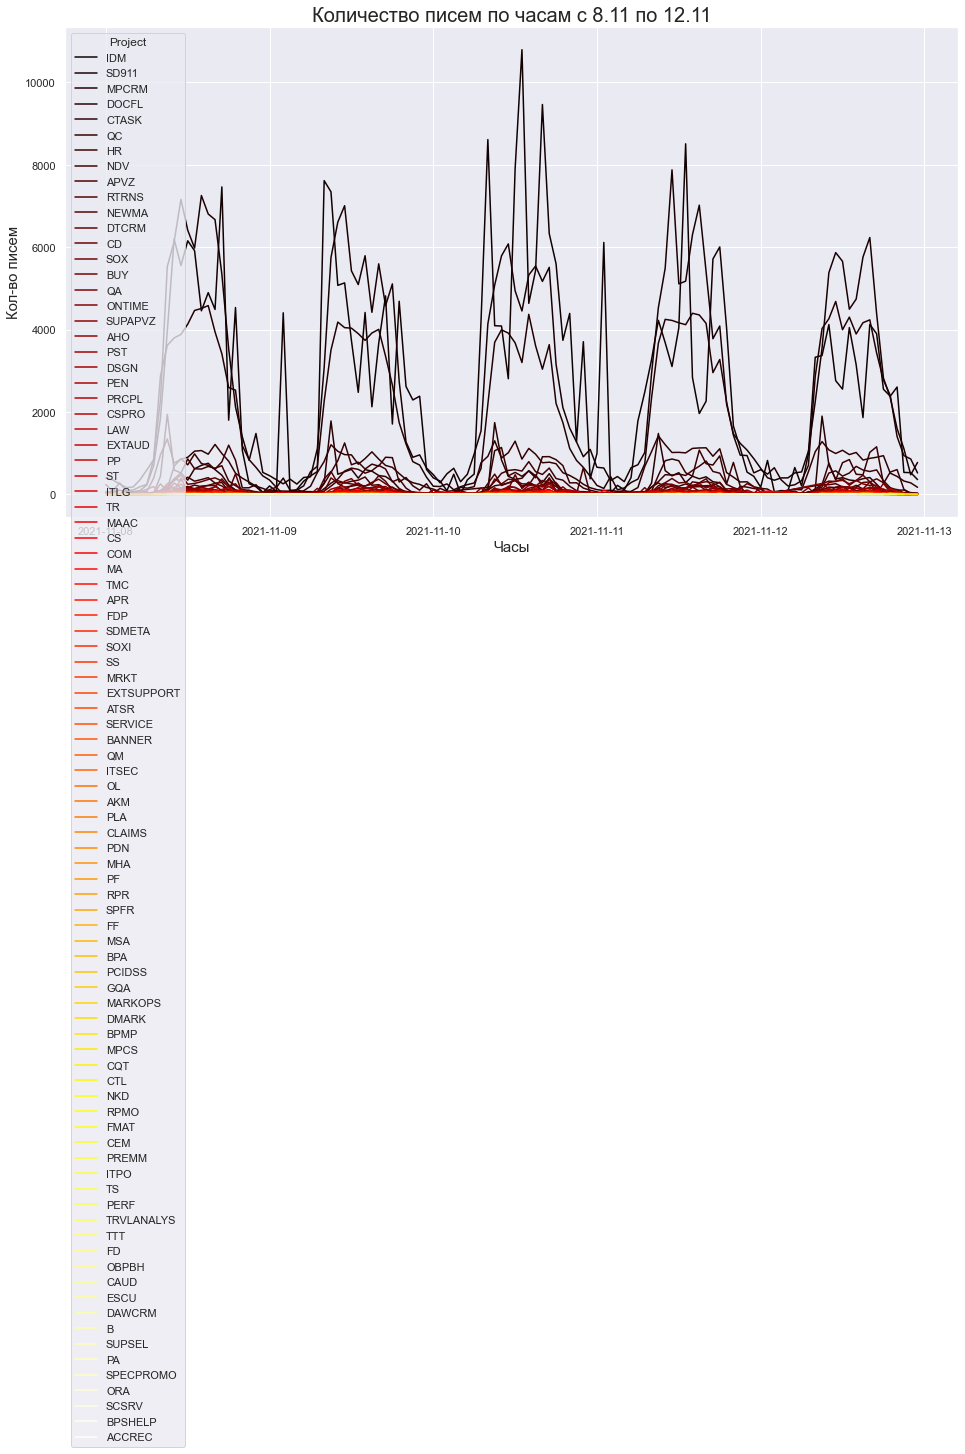

In [398]:
# Рисуем график

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)

plot=sns.lineplot(x="Date_h", y="Count",
             hue="Project",
             data=df_to_plot, palette = "hot", dashes = False,  legend="brief",)
plt.title("Количество писем по часам с 8.11 по 12.11", fontsize = 20)
plt.xlabel("Часы", fontsize = 15)
plt.ylabel("Кол-во писем", fontsize = 15)
plt.show()



In [399]:
#Топ 20 записей по часам
print(df_to_plot.head(20))

                  Date_h Project  Count
2428 2021-11-10 13:00:00     IDM  10794
2623 2021-11-10 16:00:00     IDM   9464
2142 2021-11-10 08:00:00     IDM   8613
3428 2021-11-11 13:00:00     IDM   8510
2365 2021-11-10 12:00:00     IDM   7910
3332 2021-11-11 11:00:00   SD911   7878
1160 2021-11-09 08:00:00     IDM   7616
695  2021-11-08 17:00:00     IDM   7464
1206 2021-11-09 09:00:00     IDM   7345
524  2021-11-08 14:00:00   SD911   7255
326  2021-11-08 11:00:00   SD911   7162
3584 2021-11-11 15:00:00   SD911   7021
1356 2021-11-09 11:00:00   SD911   7008
591  2021-11-08 15:00:00   SD911   6807
659  2021-11-08 16:00:00   SD911   6669
1291 2021-11-09 10:00:00   SD911   6609
391  2021-11-08 12:00:00   SD911   6412
2685 2021-11-10 17:00:00     IDM   6331
3520 2021-11-11 14:00:00   SD911   6304
4723 2021-11-12 16:00:00   SD911   6236


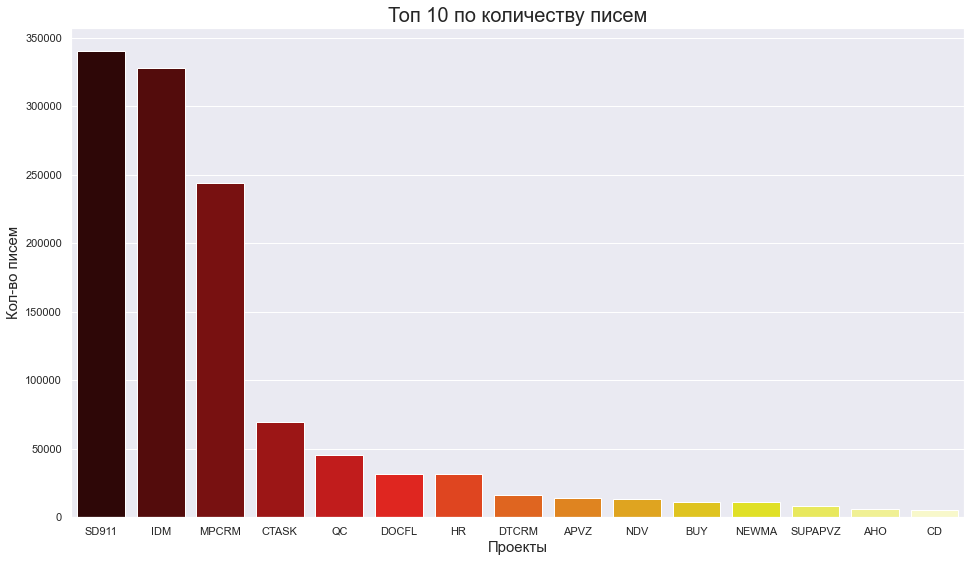

In [404]:
# Рисуем график
plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
plot=sns.barplot(x="Project", y="Count", data=df_all_grouped.head(15), palette = "hot", estimator=np.sum)
plt.title("Топ 15 по количеству писем", fontsize = 20)
plt.xlabel("Проекты", fontsize = 15)
plt.ylabel("Кол-во писем", fontsize = 15)
plt.show()

In [403]:
#Топ 15 по проектам
print(df_all_grouped.head(15))

    Project   Count
0     SD911  339932
1       IDM  327667
2     MPCRM  244021
3     CTASK   69207
4        QC   45116
5     DOCFL   31591
6        HR   31410
7     DTCRM   16341
8      APVZ   14282
9       NDV   13587
10      BUY   11499
11    NEWMA   10925
12  SUPAPVZ    8150
13      AHO    5694
14       CD    5470


In [ ]:
#Сохраняем в CSV
df_to_plot.to_csv('D:\\Work\\OZON\\8.11.21-12.11.21\\result_2.csv',sep=';')